In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

import intervals as invs
from accuracy import graph_cumulative_acc, instant_acc, time_high_acc, graph_instant_acc, graph_avg_corr_rate
from preprocessing import read_csv_clean, calculate_accuracy_by_row
import paths
from tools import get_bhv_num

### Fentanyl

In [2]:
fent_ending = []

def read_and_record(path:str, ending_corr:list, dict_corr:list):
    print(f"Processing file {path}")
    df = read_csv_clean(path, cumulative_accuracy=True, convert_large=True)
    df = calculate_accuracy_by_row(df)
    value = df['Percent_Correct'].tail(1).values[0]
    ending_corr.append(value)
    return df

In [3]:
ctrl_list = []

for path in paths.fr1_fent:
    ctrl_list.append(read_and_record(path, fent_ending, None))

/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M1.CSV
Processing file /home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M1.CSV
/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M2.CSV
Processing file /home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M2.CSV
/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M3.csv
Processing file /home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M3.csv
/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M4.CSV
Processing file /home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M4.CSV
/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M5.CSV
Processing file /home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M5.CSV


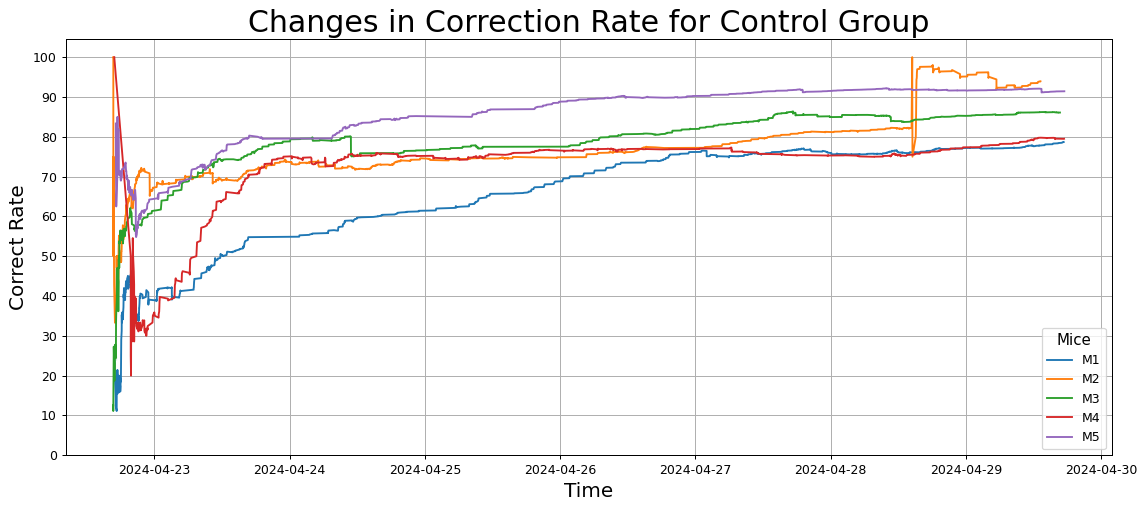

In [4]:
graph_cumulative_acc(ctrl_list, 'Control')

/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M1.CSV


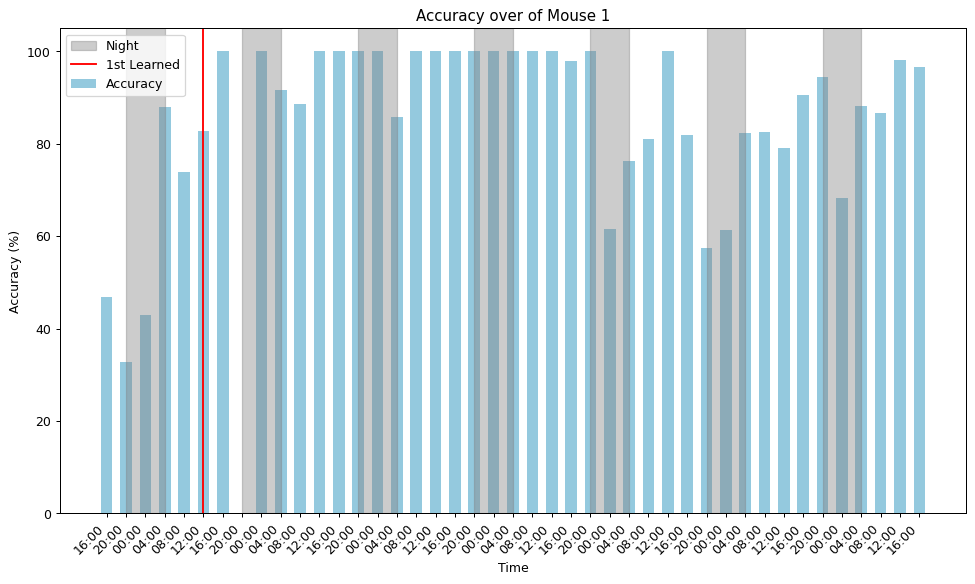

/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M2.CSV


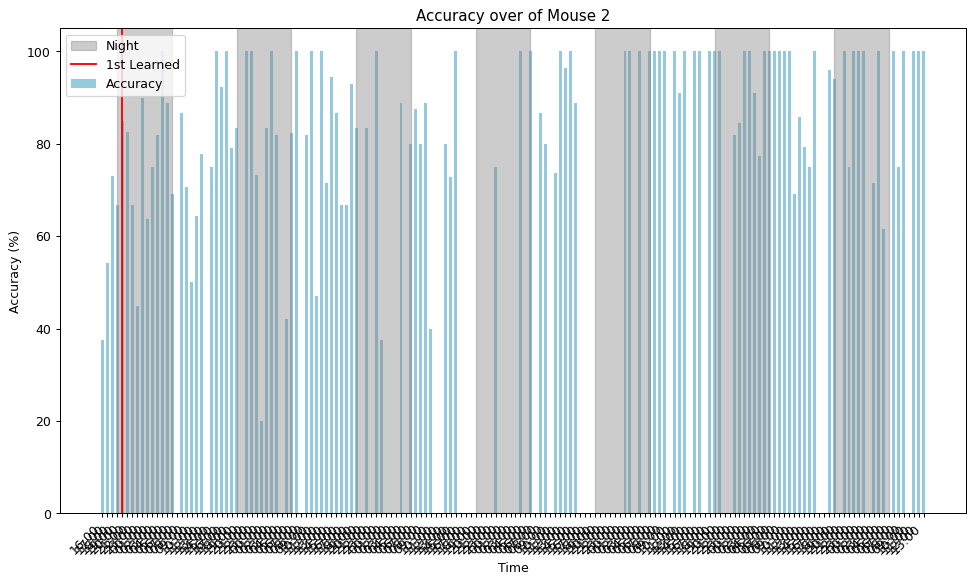

/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M3.csv


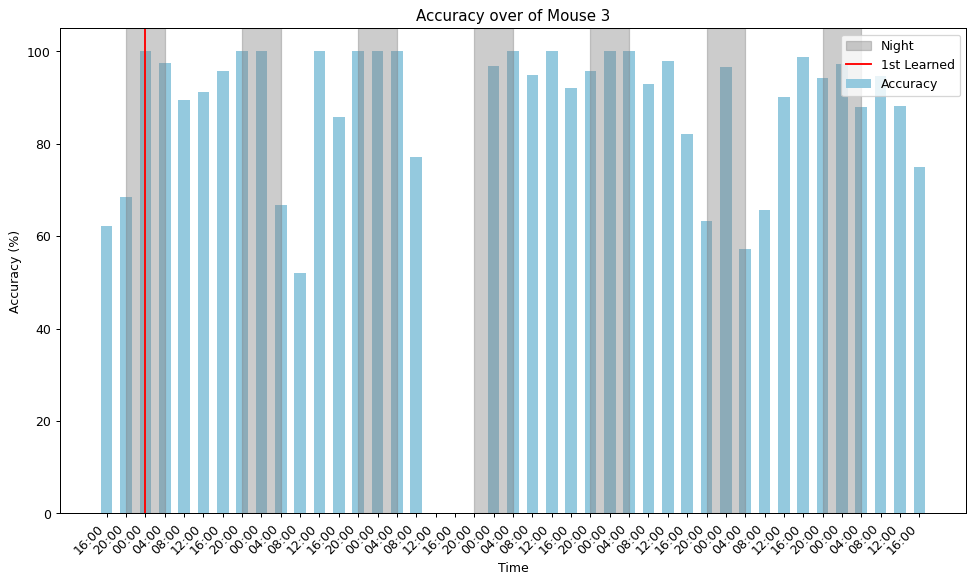

/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M4.CSV


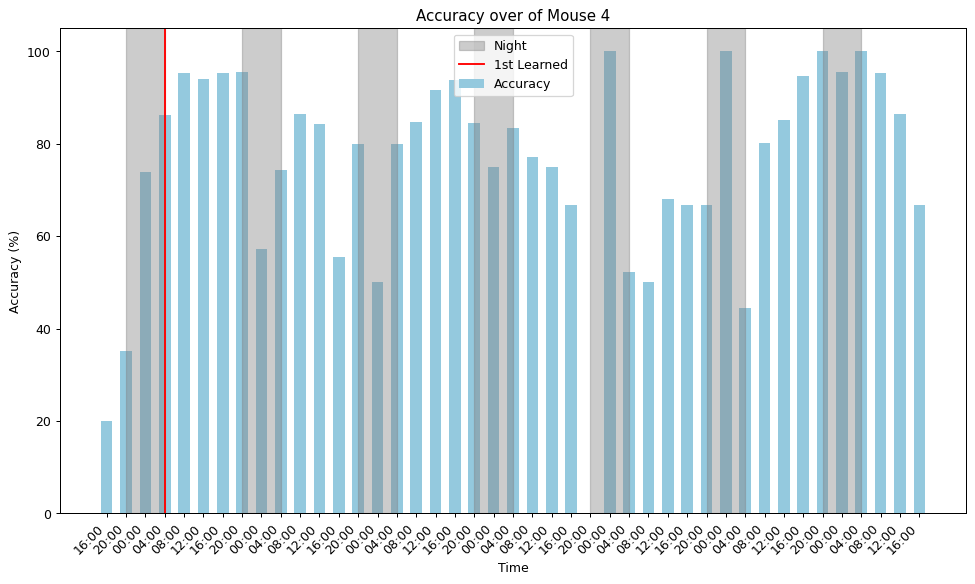

/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Fentanyl Tx/FR1/M5.CSV


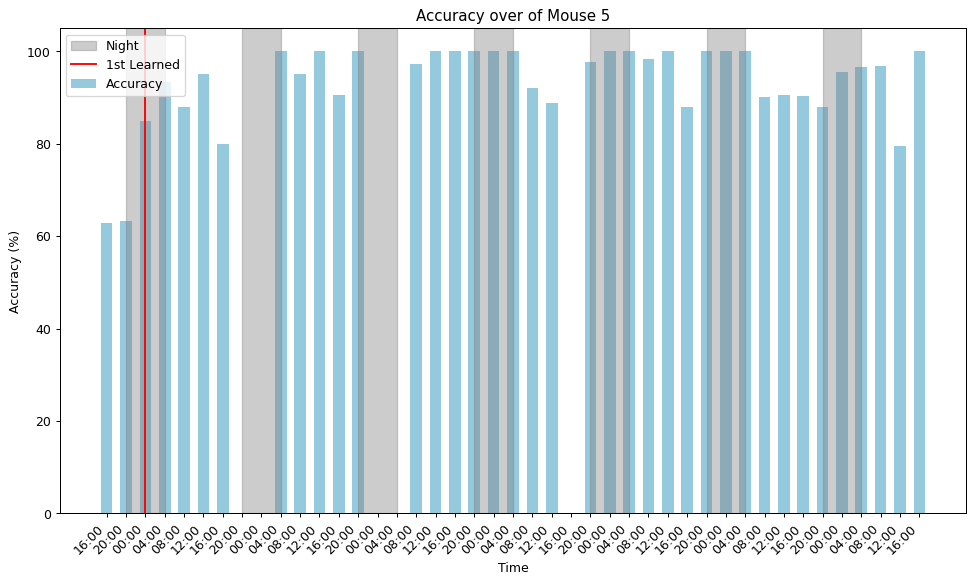

In [5]:
ctrl_times = []

for each in paths.fr1_fent:
    print(each)
    data = instant_acc(path=each, csv=True)
    stamp, hrs = time_high_acc(data)
    num = get_bhv_num(each)
    ctrl_times.append(hrs)
    graph_instant_acc(data, None, num, stamp)

## Vehcle

In [6]:
exp_list = []
veh_ending = []
for path in paths.fr1_veh:
    exp_list.append(read_and_record(path, veh_ending, None))

Processing file /home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Vehicle Tx/FR1/M10.CSV
Processing file /home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Vehicle Tx/FR1/M6.CSV
Processing file /home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Vehicle Tx/FR1/M7.CSV
Processing file /home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Vehicle Tx/FR1/M8.CSV
Processing file /home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Vehicle Tx/FR1/M9.CSV


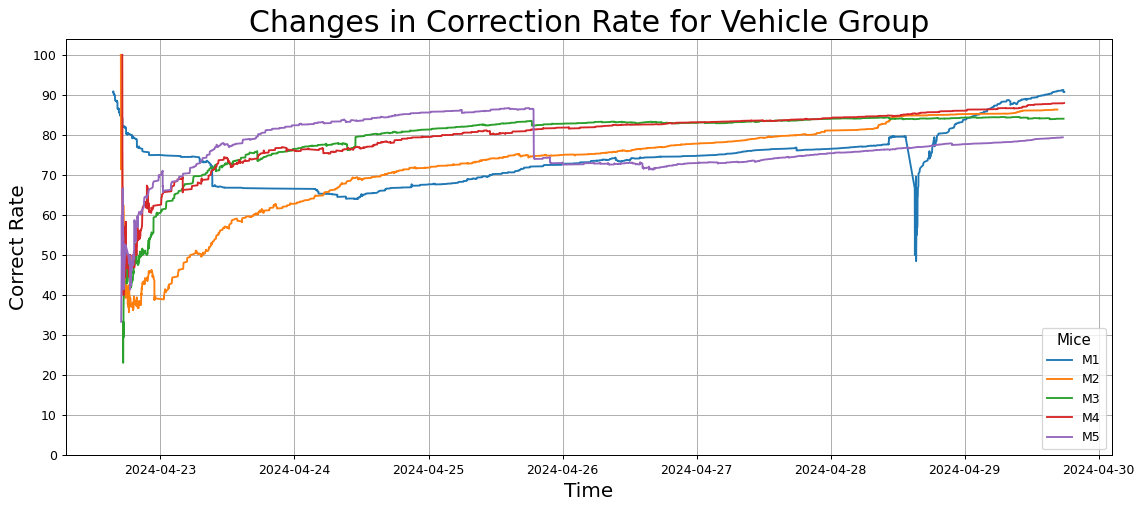

In [7]:
graph_cumulative_acc(exp_list, group="Vehicle")

/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Vehicle Tx/FR1/M10.CSV


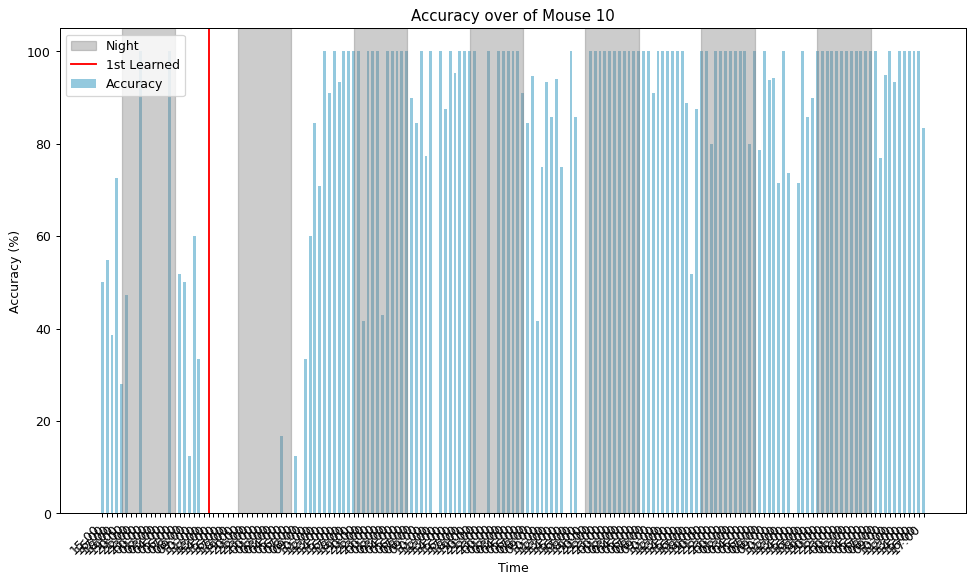

/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Vehicle Tx/FR1/M6.CSV


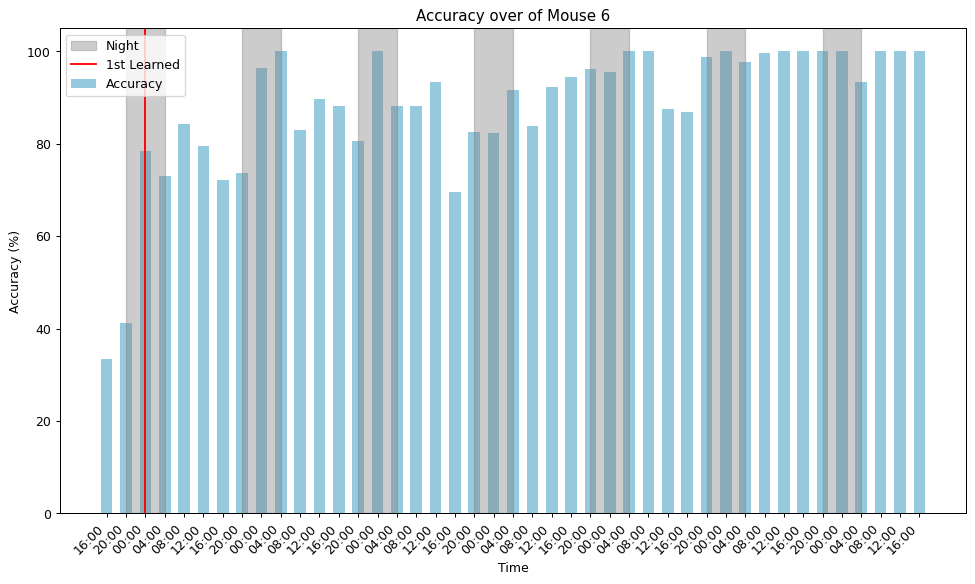

/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Vehicle Tx/FR1/M7.CSV


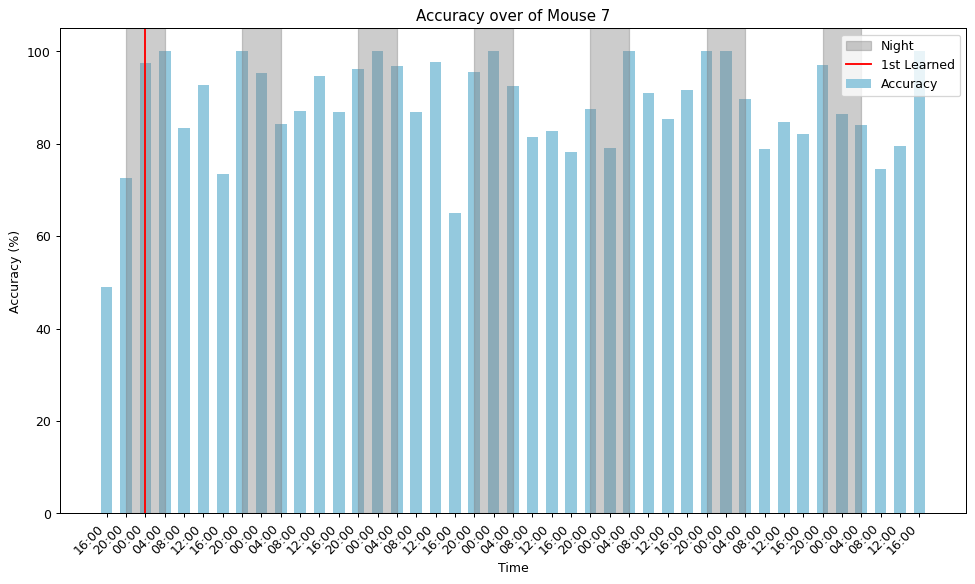

/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Vehicle Tx/FR1/M8.CSV


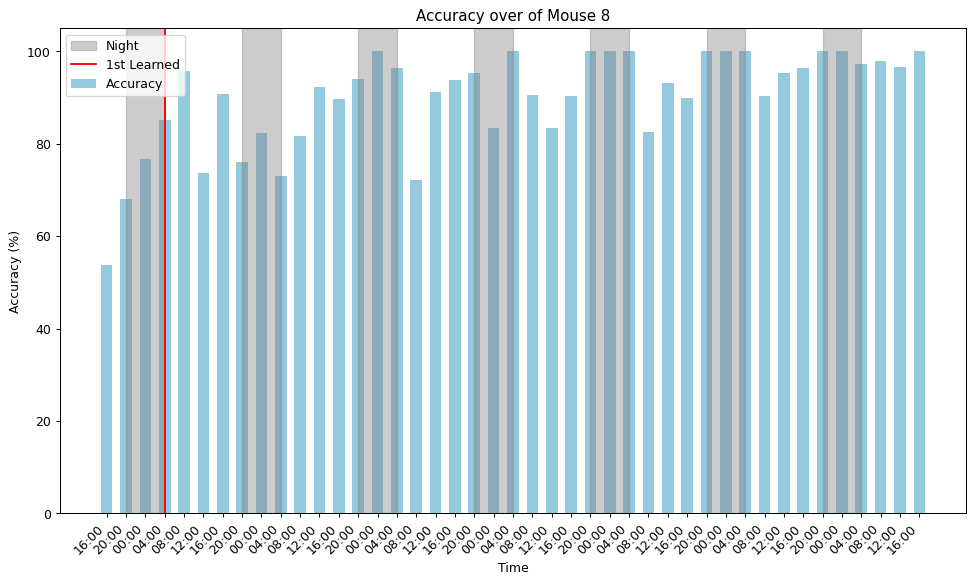

/home/ftlab/Desktop/For_Andy/behavior data integrated/mPFC/Vehicle Tx/FR1/M9.CSV


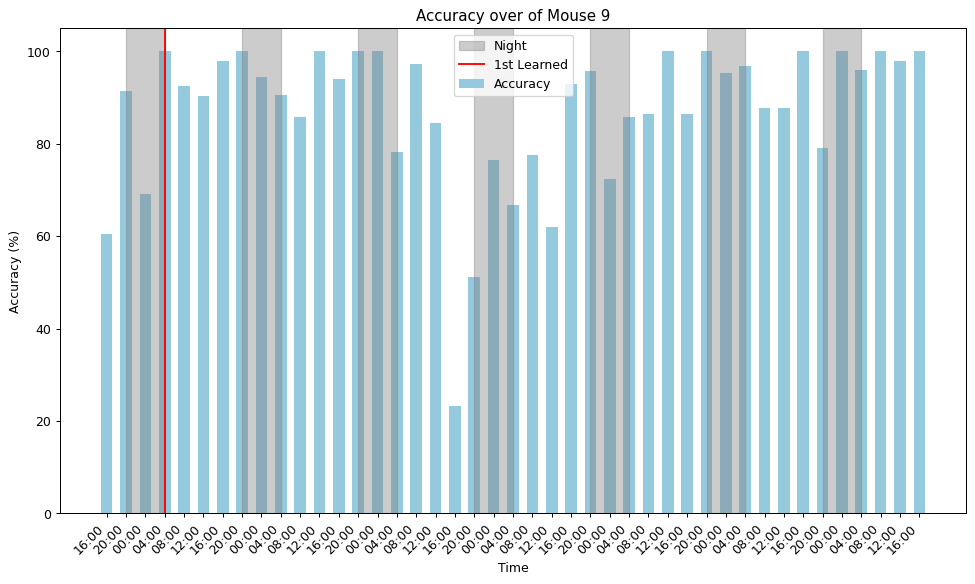

In [8]:
exp_times = []

for each in paths.fr1_veh:
    print(each)
    data = instant_acc(path=each, csv=True)
    stamp, hrs = time_high_acc(data)
    num = get_bhv_num(each)
    exp_times.append(hrs)
    graph_instant_acc(data, None, num, stamp)

In [9]:
fent_ending, veh_ending

([78.6745406824147,
  82.18773096821877,
  86.08380755302638,
  79.49826989619378,
  91.42665773610182],
 [79.44535073409462,
  86.33824276282377,
  84.0497737556561,
  87.96361091672499,
  79.39841089670828])

In [10]:
ctrl_times, exp_times

([20.0, 4.0, 8.0, 12.0, 8.0], [46.0, 32.0, 8.0, 12.0, 12.0])

In [11]:
import intervals as invs

invs.perform_T_test(ctrl=fent_ending, exp=veh_ending, test_side='two-sided')

P Value is  0.964381381344547
There is no significant difference between the two groups.


In [13]:
invs.perform_T_test(ctrl=ctrl_times, exp=exp_times, test_side='greater')

P Value is  0.08782968396345114
There is no significant difference between the two groups.
